# Introduction to Machine Learning
## Lecture 1 - Regression
### Notebook 2: Regression Analysis on Building Energy Efficiency
Prapared by: Said Bolluk

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [3]:
data = pd.read_csv("../datasets/energy_efficiency_data.csv")
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Create a copy of the data for future use
energy_data = data.copy()

For this notebook, we will only analyze the **Heating Load** as our target variable.

In [4]:
# Define the target
y = data["Heating_Load"]
# Define the features
data = data.drop(columns=["Heating_Load", "Cooling_Load"])

# Drop also the categorical variable
data = data.drop(columns="Orientation")

Let us analze the distribution of each feature variable. We will use histogram for visualization.

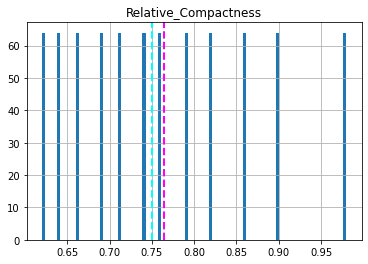

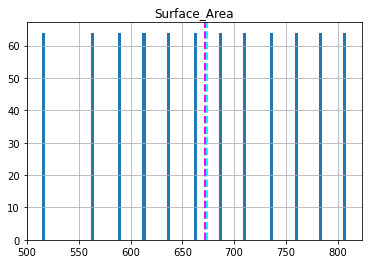

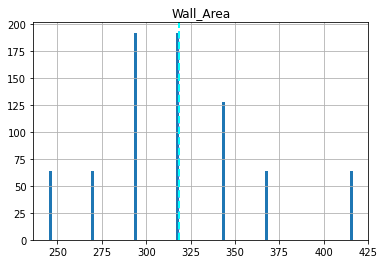

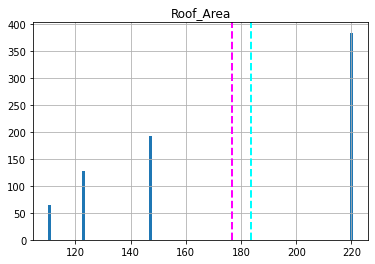

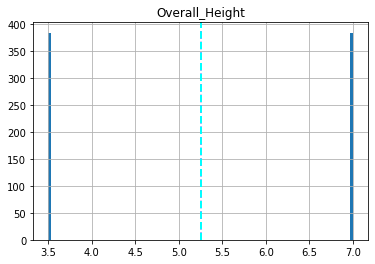

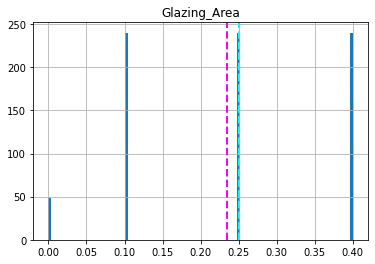

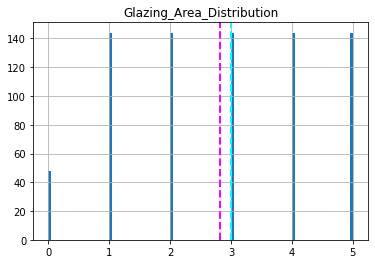

In [5]:
# Plot a histogram for the features
col_names = data.columns
for col in col_names:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

From the above histograms, we see that some of the features have **uniform distribution** (Relative_Compactness, Surface_Area, Glazing_Area_Distribution) and **Gaussian distribution** (Wall_Area), while some are unevenly distributed (Roof_Area,  Overall_Height, Glazing_Area). Here, we will discard the features that are unevenly distributed.

In [6]:
# Drop the features that are unevenly distributed
data = data.drop(columns=["Roof_Area", "Overall_Height", "Glazing_Area"])
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,0
1,0.98,514.5,294.0,0
2,0.98,514.5,294.0,0
3,0.98,514.5,294.0,0
4,0.90,563.5,318.5,0


Let us now observe the correlation between the features and the target. The objective is to find the proper features that can be used in training the regression model. We will use **scatter plots** to read the correlation since all the features are numeric variables.

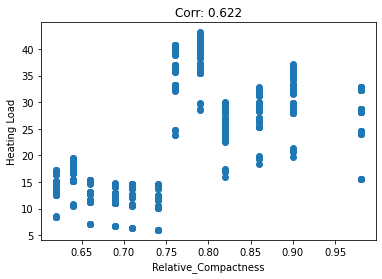

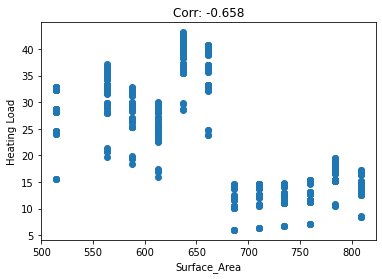

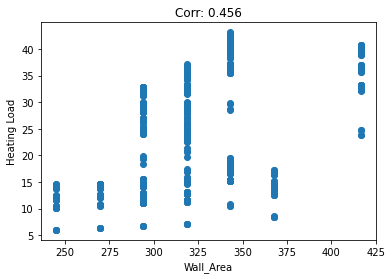

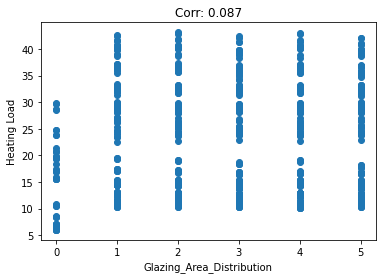

In [7]:
col_names = data.columns
for col in col_names:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature = data[col]
    label = y
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel("Heating Load")
    ax.set_title("Corr: " + str(np.round(correlation, 3)))
plt.show()

Two features, **Relative_Compactness** and **Surface_Area**, has a high correlation with the target variable **Heating_Load**. For the simplicity, we will continue the regression analysis only with Relative_Compactness.

In [8]:
X = energy_data["Relative_Compactness"].values
y = energy_data["Heating_Load"].values

# Reshape the data
X = np.reshape(X, (-1, 1))
y = np.reshape(y, (-1, 1))

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 576
Test size: 192


Finally, let us check if there is any missing data.

In [9]:
data.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Glazing_Area_Distribution    0
dtype: int64

Since there is no missing data, we can perform regression.

# Regression Analysis

In [14]:
# Train the model
from sklearn.linear_model import LinearRegression

# Define a model
regressor = LinearRegression()
# Train the model over training set
regressor.fit(X_train, y_train)

# Validate the model over test set
predictions = regressor.predict(X_test)

In [15]:
regressor.coef_

array([[59.52666112]])

In [16]:
regressor.intercept_

array([-23.24999994])

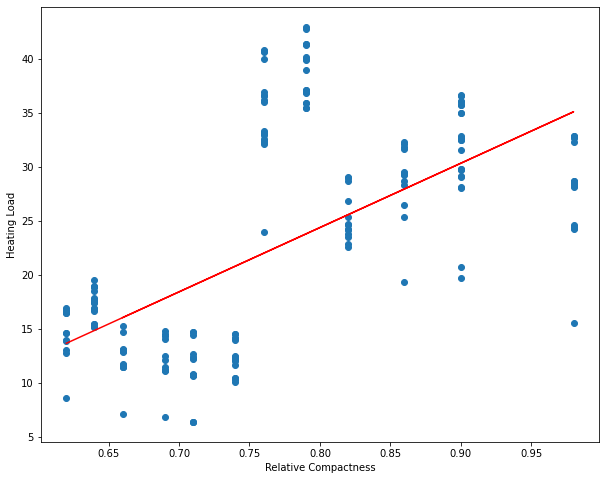

In [11]:
# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, color="red")
plt.xlabel("Relative Compactness")
plt.ylabel("Heating Load")
plt.show()

Regression Evaluation Metrics

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = np.round(mean_squared_error(y_test, predictions), 3)
print("MSE:", mse)

r2 = np.round(r2_score(y_test, predictions), 3)
print("R2:", r2)

MSE: 66.281
R2: 0.369


It is evident that the model failed to explain the variation of the dataset according to the low R2 value (0.369). To imrove the model performance in presenting the correlation between the Heating Load and the features, more features can be introduced. This will increase the generalization capacity of the model. Moreoever, scaling the features might help.

# END